# Applying Word-Embeddings


There are different options to work with Word-Embeddings:
1. Trained Word-Embeddings can be downloaded from the web. These Word-Embeddings differ in
    * the method, e.g. Skipgram, CBOW, GloVe, fastText 
    * in the hyperparameter applied for the selected method, e.g. context-length
    * in the corpus, which has been applied for training
2. By applying packages such as [gensim](https://radimrehurek.com/gensim/) word-embeddings can easily be trained from an arbitrary collection of texts 
3. Training of a word embedding can be integrated into an end-to-end neural network for a specific application. For example, if a Deep-Nerual-Network shall be learned for document-classification, the first layer in this network can be defined, such that it learns a task-specific word-embedding from the given document-classification-training-data.

In this notebook option 1 and 2 are demonstrated. Option 3 is applied in a later lecture

## Apply Pre-Trained Word-Embeddings
### FastText


The [FastText project](https://fasttext.cc) provides word-embeddings for 157 different languages, trained on [Common Crawl](https://commoncrawl.org/) and [Wikipedia](https://www.wikipedia.org/). These word embeddings can easily be downloaded and imported to Python. The `KeyedVectors`-class of [gensim](https://radimrehurek.com/gensim/) can be applied for the import. This class also provides many useful tools, e.g. an index to fastly find the vector of an arbitrary word or function to calculate similarities between word-vectors. Some of these tools will be demonstrated below: 

After downloading word embeddings from [FastText](https://fasttext.cc/docs/en/english-vectors.html) they can be imported into a `KeyedVectors`-object from gensim as follows:

In [1]:
#!pip install numpy==1.20.1

In [2]:
from gensim.models import KeyedVectors
import numpy as np
import warnings
np.__version__

'1.20.1'

In [3]:
warnings.filterwarnings("ignore")

In [4]:
# Creating the model
#en_model = KeyedVectors.load_word2vec_format('/Users/maucher/DataSets/Gensim/FastText/Gensim/FastText/wiki-news-300d-1M.vec')
#en_model = KeyedVectors.load_word2vec_format(r'C:\Users\maucher\DataSets\Gensim\Data\Fasttext\wiki-news-300d-1M.vec\wiki-news-300d-1M.vec') #path on surface
#en_model = KeyedVectors.load_word2vec_format('/Users/maucher/DataSets/Gensim/FastText/fasttextEnglish300.vec')
en_model = KeyedVectors.load_word2vec_format('/Users/johannes/DataSets/Gensim/FastText/fasttextEnglish300.vec') # path on iMAC

The number of vectors and their length can be accessed as follows:

In [13]:
# Printing out number of tokens available
print("Number of Tokens: {}".format(en_model.vectors.shape[0]))

# Printing out the dimension of a word vector 
print("Dimension of a word vector: {}".format(en_model.vectors.shape[1]))

Number of Tokens: 999994
Dimension of a word vector: 300


The first 20 words in the index:

In [71]:
en_model.wv.index2word[:20]

[',',
 'the',
 '.',
 'and',
 'of',
 'to',
 'in',
 'a',
 '"',
 ':',
 ')',
 'that',
 '(',
 'is',
 'for',
 'on',
 '*',
 'with',
 'as',
 'it']

The first 10 components of the word-vector for *evening*:

In [66]:
en_model["evening"][:10]

array([-0.0219,  0.0138, -0.0924, -0.0028, -0.0823, -0.1428,  0.0269,
       -0.0193,  0.0447,  0.0336], dtype=float32)

The first 10 components of the word-vector for *morning*:

In [67]:
en_model["morning"][:10]

array([-0.0025,  0.0429, -0.1727,  0.0185, -0.0414, -0.1486,  0.0326,
       -0.0501,  0.1374, -0.1151], dtype=float32)

The similarity between *evening* and *morning*:

In [83]:
similarity = en_model.similarity('morning', 'evening')
similarity

0.8645973

The 20 words, which are most similar to word *wood*:

In [73]:
en_model.most_similar("wood",topn=20)

[('timber', 0.7636732459068298),
 ('lumber', 0.7316348552703857),
 ('kiln-dried', 0.7024550437927246),
 ('wooden', 0.6998946666717529),
 ('oak', 0.674289345741272),
 ('plywood', 0.6731638312339783),
 ('hardwood', 0.6648495197296143),
 ('woods', 0.6632275581359863),
 ('pine', 0.654842734336853),
 ('straight-grained', 0.6503476500511169),
 ('wood-based', 0.6416549682617188),
 ('firewood', 0.6402209997177124),
 ('iroko', 0.6389516592025757),
 ('metal', 0.6362859606742859),
 ('timbers', 0.6347957849502563),
 ('quartersawn', 0.6330605149269104),
 ('Wood', 0.6307631731033325),
 ('forest', 0.6296596527099609),
 ('end-grain', 0.6279916763305664),
 ('furniture', 0.6257956624031067)]

### GloVe
As described [before](05representations.md) GloVe constitutes another method for calculating Word-Embbedings. Pre-trained GloVe vectors can be downloaded from
[Glove](https://nlp.stanford.edu/projects/glove/) and imported into Python. However, gensim already provides a downloader for several word-embeddings, including GloVe embeddings of different length and different training-data. 

The corpora and embeddings, which are available via the gensim downloader, can be queried as follows:

In [84]:
import gensim.downloader as api

In [93]:
api.info(name_only=True)

{'corpora': ['semeval-2016-2017-task3-subtaskBC',
  'semeval-2016-2017-task3-subtaskA-unannotated',
  'patent-2017',
  'quora-duplicate-questions',
  'wiki-english-20171001',
  'text8',
  'fake-news',
  '20-newsgroups',
  '__testing_matrix-synopsis',
  '__testing_multipart-matrix-synopsis'],
 'models': ['fasttext-wiki-news-subwords-300',
  'conceptnet-numberbatch-17-06-300',
  'word2vec-ruscorpora-300',
  'word2vec-google-news-300',
  'glove-wiki-gigaword-50',
  'glove-wiki-gigaword-100',
  'glove-wiki-gigaword-200',
  'glove-wiki-gigaword-300',
  'glove-twitter-25',
  'glove-twitter-50',
  'glove-twitter-100',
  'glove-twitter-200',
  '__testing_word2vec-matrix-synopsis']}

We select the GloVe word-embeddings `glove-wiki-gigaword-100` for download: 

In [92]:
word_vectors = api.load("glove-wiki-gigaword-100")  # load pre-trained word-vectors from gensim-data

In [94]:
type(word_vectors)

gensim.models.keyedvectors.Word2VecKeyedVectors

As can be seen in the previous output, the downloaded data is available as a `KeyedVectors`-object. Hence the same methods can now be applied as in the case of the FastText - Word Embedding in the previous section. In the sequel we will apply not only the methods used above, but also new ones.

Word analogy questions like *man is to king as woman is to ?* can be solved as in the code cell below:

In [95]:
result = word_vectors.most_similar(positive=['woman', 'king'], negative=['man'])
print("{}: {:.4f}".format(*result[0]))

queen: 0.7699


Outliers within sets of words can be determined as follows:

In [96]:
print(word_vectors.doesnt_match("breakfast cereal dinner lunch".split()))

cereal


Similiarity between a pair of words:

In [98]:
similarity = word_vectors.similarity('woman', 'man')
print(similarity)

0.8323494


Most similar words to *cat*:

In [106]:
word_vectors.most_similar("cat",topn=20)

[('dog', 0.8798074722290039),
 ('rabbit', 0.7424427270889282),
 ('cats', 0.7323004007339478),
 ('monkey', 0.7288710474967957),
 ('pet', 0.7190139293670654),
 ('dogs', 0.7163873314857483),
 ('mouse', 0.6915251016616821),
 ('puppy', 0.6800068616867065),
 ('rat', 0.6641027331352234),
 ('spider', 0.6501134634017944),
 ('elephant', 0.6372530460357666),
 ('boy', 0.6266894340515137),
 ('bird', 0.6266419887542725),
 ('baby', 0.6257247924804688),
 ('pig', 0.6254673004150391),
 ('horse', 0.6251551508903503),
 ('snake', 0.6227242350578308),
 ('animal', 0.6200780272483826),
 ('dragon', 0.6187658309936523),
 ('duck', 0.6158087253570557)]

Similarity between sets of words:

In [108]:
sim = word_vectors.n_similarity(['sushi', 'shop'], ['japanese', 'restaurant'])
print("{:.4f}".format(sim))

0.7067


First 10 components of word vector for *computer*:

In [109]:
vector = word_vectors['computer']  # numpy vector of a word
print(vector.shape)
print(vector[:10])

(100,)
[-0.16298   0.30141   0.57978   0.066548  0.45835  -0.15329   0.43258
 -0.89215   0.57747   0.36375 ]


The magnitude of the previous word-vector.

In [110]:
np.sqrt(np.sum(np.square(vector)))

6.529161

As can be seen in the previous code cell the vectors are not normalized to unique length. However, if the argument `use_norm` is enabled, the resulting vectors are normalized:

In [173]:
vector = word_vectors.word_vec('office', use_norm=True)
print(vector.shape)
print(vector[:10])

(100,)
[-0.01455544 -0.13056442  0.06381373 -0.00747831  0.10621653  0.02454428
 -0.08777763  0.1584893   0.0725054   0.08593655]


In [174]:
np.sqrt(np.sum(np.square(vector)))

1.0

## Visualisation of Word-Vectors

Typical lengths of DSM word vectors are in the range between 50 and 300. In the FastText example above vectors of length 300 have been applied. The applied GloVe vectors had a length of 100. In any case they can not directly be visualised. However, methods to reduce the dimensionality of vectors in such a way, that their overall spatial distribution is maintained as much as possible can be applied to transform word vectors into 2-dimensional space. In the code cells below this is demonstrated by applying **TSNE**, the most prominent technique to transform word-vectors into 2-dimensional space: 

In [175]:
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt

In [176]:
tsneModel=TSNE(n_components=2,random_state=0)
np.set_printoptions(suppress=True)
model2d=tsneModel.fit_transform(word_vectors[word_vectors.index2word[300:600]])

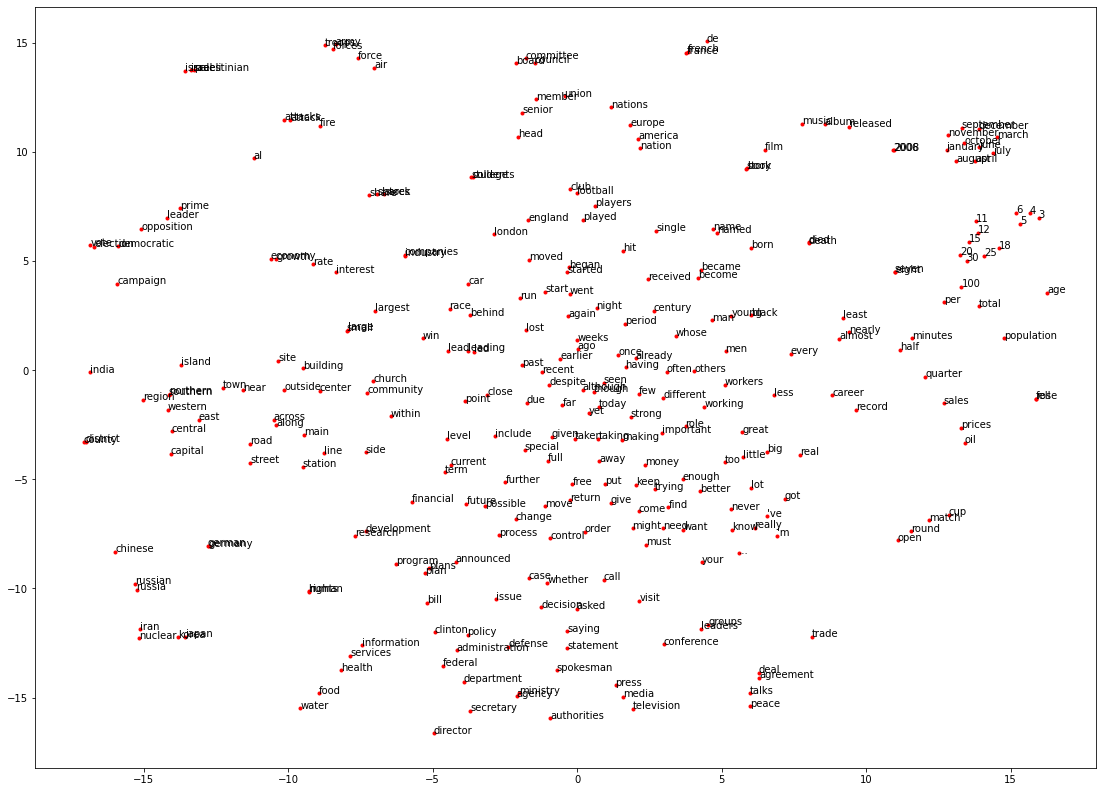

In [177]:
#%matplotlib inline
plt.figure(figsize=(19,14))
idx=0
for a in model2d[:300]:
    w=word_vectors.wv.index2word[300+idx]
    plt.plot(a[0],a[1],'r.')
    plt.text(a[0],a[1],w)
    idx+=1
plt.show()

This simple visualisation already indicates, that the vectors of similar words are closer to each other, than the vectors of unrelated words.

## Train Word Embedding
In this section it is demonstrated how [gensim](https://radimrehurek.com/gensim/) can be applied to train a Word2Vec (either CBOW or Skipgram) embedding from an arbitrary corpus. In this demo the applied training corpus is the complete English Wikipedia dump.   

### Download and Extract Wikipedia Dump

Wikipedia dumps can be downloaded from [here](https://dumps.wikimedia.org/other/wikibase/wikidatawiki/). After downloading the dump the most convenient way to extract and clean the text is to apply the [WikiExtractor](https://github.com/attardi/wikiextractor). This tool generates plain text from a Wikipedia database dump, discarding any other information or annotation present in Wikipedia pages, such as images, tables, references and lists.
The output is stored in a number of files of similar size in a given directory.

The class `MySentences`, as defined in the following code-cell, extracts from all directories and files under `dirnameP` the sentences in a format, which can be processed by the applied gensim model.

In [3]:
import os,logging
from gensim.models import word2vec

In [4]:
class MySentences(object):
    def __init__(self, dirnameP):
        self.dirnameP = dirnameP
 
    def __iter__(self):
        for subdir in os.listdir(self.dirnameP):
            print(subdir)
            if subdir==".DS_Store":
                continue
            subdirpath=os.path.join(self.dirnameP,subdir)
            print(subdirpath)
            for fname in os.listdir(subdirpath):
                if fname[:4]=="wiki":
                    for line in open(os.path.join(subdirpath, fname)):
                        linelist=line.split()
                        if len(linelist)>3 and linelist[0][0]!="<":
                            yield [w.lower().strip(",."" \" () :; ! ?") for w in linelist]

The path to the directory, which contains the entire extracted Wikipedia dump is configured and the subdirectories under this path are listed:

In [5]:
#parentDir="C:\\Users\\maucher\\DataSets\\Gensim\\Data\\wiki_dump_extracted"
parentDir="/Users/johannes/DataSets/wikiextractor/text" #path on iMAC
#parentDir="C:\Users\Johannes\DataSets\Gensim\Data\wiki_dump_extracted"
dirlistParent= os.listdir(parentDir)
print(dirlistParent)

['AX', 'BW', 'DN', 'DI', 'BP', 'BY', 'AV', '.DS_Store', 'DG', 'AQ', 'DU', 'BL', 'AC', 'BK', 'DR', 'AD', 'AM', 'BB', 'AJ', 'BE', 'DF', 'AP', 'BX', 'DA', 'AW', 'DH', 'BQ', 'AY', 'BV', 'DO', 'AK', 'BD', 'AL', 'DZ', 'BC', 'BJ', 'DS', 'AE', 'DT', 'BM', 'AB', 'EY', 'CG', 'EW', 'CN', 'CI', 'EP', 'EB', 'EE', 'CU', 'EL', 'FC', 'EK', 'CR', 'FD', 'CH', 'EQ', 'EV', 'CO', 'CF', 'EX', 'CA', 'EJ', 'CS', 'FE', 'CT', 'EM', 'FB', 'ED', 'CZ', 'EC', 'BH', 'DQ', 'AG', 'DV', 'BO', 'AI', 'BF', 'AN', 'DX', 'BA', 'DJ', 'BS', 'BT', 'DM', 'DD', 'AR', 'BZ', 'DC', 'AU', 'AO', 'DY', 'AH', 'BG', 'DW', 'BN', 'AA', 'BI', 'DP', 'AF', 'DB', 'AT', 'DE', 'AS', 'AZ', 'BU', 'DL', 'DK', 'BR', 'EF', 'CX', 'EA', 'EH', 'CQ', 'CV', 'EO', 'CD', 'EZ', 'CC', 'CJ', 'ES', 'ET', 'CM', 'CW', 'EN', 'FA', 'EI', 'CP', 'FF', 'CY', 'EG', 'EU', 'CL', 'CK', 'ER', 'CB', 'CE']


### Training or Loading of a CBOW model
In the following code cell a name for the word2vec-model is specified. If the specified directory already contains a model with the specified name, it is loaded. Otherwise, it is generated and saved under the specified name. A **skipgram-model** can be generated in the same way. In this case `model = word2vec.Word2Vec(sentences,size=200,sorted_vocab=1)` has to be replaced by `model = word2vec.Word2Vec(sentences,size=200,sorted_vocab=1,sg=1)`. 
See [gensim model.Word2Vec documentation](https://radimrehurek.com/gensim/models/word2vec.html) for the configuration of more parameters. 

> Note that the training of this model takes several hours. If you like to generate a much smaller model from a smaller corpus (English!) you can download the text8 corpus from [http://mattmahoney.net/dc/text8.zip](http://mattmahoney.net/dc/text8.zip), extract it and replace the code in the following code-cell by this:
```
sentences = word2vec.Text8Corpus('C:\\Users\\maucher\\DataSets\\Gensim\\Data\\text8')
model = word2vec.Word2Vec(sentences,size=200)
```

In [14]:
modelName="/Users/johannes/DataSets/wikiextractor/models/wikiEng20201007.model"
try:
    model=word2vec.Word2Vec.load(modelName)
    print("Already existing model is loaded")
except:
    print("Model doesn't exist. Training of word2vec model started.")
    sentences = MySentences(parentDir) # a memory-friendly iterator
    model = word2vec.Word2Vec(sentences,size=200,sorted_vocab=1)
model.init_sims(replace=True)
model.save(modelName)

Already existing model is loaded


In [13]:
type(model)

gensim.models.word2vec.Word2Vec

In the code cell above the Word2Vec model has either been created or loaded. For the returned object of type `Word2Vec` basically the same functions are available as for the pretrained FastText and GloVe word embeddings in the sections above. 

For example the most similar words for *cat* are:

In [9]:
model.most_similar("cat",topn=20)

[('dog', 0.8456131219863892),
 ('rabbit', 0.796753466129303),
 ('monkey', 0.742573082447052),
 ('kitten', 0.7295641899108887),
 ('pug', 0.7040250301361084),
 ('dachshund', 0.7017481327056885),
 ('poodle', 0.7012854814529419),
 ('cats', 0.6982499361038208),
 ('rat', 0.6904729604721069),
 ('mouse', 0.6898518800735474),
 ('rottweiler', 0.6748534440994263),
 ('pet', 0.6683299541473389),
 ('puppy', 0.666095495223999),
 ('goat', 0.6655623912811279),
 ('doll', 0.6638575792312622),
 ('pig', 0.6573764085769653),
 ('scaredy', 0.6482968330383301),
 ('parrot', 0.6454174518585205),
 ("cat's", 0.6422038078308105),
 ('feline', 0.6345723271369934)]

For the trained Word2Vec-model also parameters, which describe training, corpus and the model itself, can be accessed, as demonstrated below: 

In [12]:
print("Number of words in the corpus used for training the model: ",model.corpus_count)
print("Number of words in the model: ",len(model.wv.index2word))
print("Time [s], required for training the model: ",model.total_train_time)
print("Count of trainings performed to generate this model: ",model.train_count)
print("Length of the word2vec vectors: ",model.vector_size)
print("Applied context length for generating the model: ",model.window)

Number of words in the corpus used for training the model:  38539221
Number of words in the model:  2366981
Time [s], required for training the model:  10237.432892589999
Count of trainings performed to generate this model:  1
Length of the word2vec vectors:  200
Applied context length for generating the model:  5
